## Getting Started

In [1]:
from bls_transformer import BLS
import json
import numpy as np
import pandas as pd
#Importing the necessary packages

In [2]:
series_id=['CUUR0000SA0',
'CES0500000003',
'APU00007471A',
'APU000072610',
'CES0500000002',
'CES3133100002',
'CES3231300002',
'CES3133200002',
'CES3232200002',
'CEU6500000002',
'CES3232300002'
]
start_year='2006'
end_year='2022'
with open('config.json','r') as json_file:
    reg_key=json.load(json_file) #Get your API key @ https://data.bls.gov/registrationEngine/

#Initializing variables
#Alternatively, we could create a config.json file

## Using The 'BLS_transformer' Class

In [3]:
bls=BLS.API(series_id=series_id,start_year=start_year,end_year=end_year,registration_key=reg_key['registrationkey'])
#Intializes the BLS object
#A config.json will be passed using the 'config' parameter

Request Status: REQUEST_SUCCEEDED


In [4]:
bls.transform_json()
#Converting the Python dict to a dictionary of DataFrames

Success! Use get_DataFrame() to access one or more DataFrames by its index or id.


## Accessing The bls Object

In [5]:
df1=bls.get_DataFrame(id=['CUUR0000SA0',
'CES0500000003',
'APU00007471A',
'APU000072610'],index=[0,1])

df2=bls.get_DataFrame(index=[i for i in range(5,len(series_id))])

#Accessing the DataFrames by series ID(s)

In [92]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
#Removing null values

In [93]:
df1.tail()
#Viewing the accessed DF

CUUR0000SA0                                                     \
                   Year Period Period Name  Value  Year Period Period Name   
Year Period                                                                  
2006 7             2006      7        July  203.5  2006      7        July   
     6             2006      6        June  202.9  2006      6        June   
     5             2006      5         May  202.5  2006      5         May   
     4             2006      4       April  201.5  2006      4       April   
     3             2006      3       March  199.8  2006      3       March   

                   CES0500000003         ...                    APU00007471A  \
             Value          Year Period  ... Period Name  Value         Year   
Year Period                              ...                                   
2006 7       203.5          2006      7  ...        July   20.3         2006   
     6       202.9          2006      6  ...        June  20.22         2006   
     5       202.5          2006      5  ...         May  20.13         2006   
     4       201.5          2006      4  ...       April  20.16         2006   
     3       199.8          2006      3  ...       March  20.04         2006   

                                      APU000072610                            
            Period Period Name  Value         Year Period Period Name  Value  
Year Period                                                                   
2006 7           7        July  3.046         2006      7        July  0.118  
     6           6        June  2.963         2006      6        June  0.118  
     5           5         May  2.993         2006      5         May   0.11  
     4           4       April  2.801         2006      4       April  0.109  
     3           3       March  2.444         2006      3       March  0.109  

[5 rows x 24 columns]

In [21]:
standardized_cpi=df1['CUUR0000SA0']['Value'].iloc[-1]
df1[('Real Amounts','Standardized CPI')]=df1['CUUR0000SA0']['Value'].apply(lambda x: x/standardized_cpi)
#Standardizing CPI

In [22]:
df1[('Real Amounts','Real Wages')]=df1['CES0500000003']['Value']/df1['Real Amounts']['Standardized CPI']
df1[('Real Amounts','Real Cost of Gas')]=df1['APU00007471A']['Value']/df1['Real Amounts']['Standardized CPI']
df1[('Real Amounts','Real Cost of Electricity')]=df1['APU000072610']['Value']/df1['Real Amounts']['Standardized CPI']
#Using the standardized CPI to calculate Real amounts (as opposed to Nominal)

In [23]:
df1[('Real % Changes','Change in Real Wages')]=df1[('Real Amounts','Real Wages')][::-1].pct_change()
df1[('Real % Changes','Change in Real Cost of Gas')]=df1[('Real Amounts','Real Cost of Gas')][::-1].pct_change()
df1[('Real % Changes','Change in Real Cost of Electricity')]=df1[('Real Amounts','Real Cost of Electricity')][::-1].pct_change()
#Calculating the Percentage Change from Period to Period

In [24]:
df_transf1=pd.melt(frame=df1,id_vars=[('CUUR0000SA0','Year'),('CUUR0000SA0','Period')],
                            value_vars=[('Real % Changes','Change in Real Wages'),
                            ('Real % Changes','Change in Real Cost of Gas'),
                            ('Real % Changes','Change in Real Cost of Electricity')])
#Transforming the Data to be more easily read by graphing libraries

In [36]:
df2.tail()

CES3133100002                          CES3231300002         \
                     Year Period Period Name Value          Year Period   
Year Period                                                               
2006 7               2006      7        July  41.4          2006      7   
     6               2006      6        June  41.6          2006      6   
     5               2006      5         May  41.7          2006      5   
     4               2006      4       April  40.9          2006      4   
     3               2006      3       March  41.9          2006      3   

                              CES3133200002         ... CES3232200002        \
            Period Name Value          Year Period  ...   Period Name Value   
Year Period                                         ...                       
2006 7             July  39.4          2006      7  ...          July  40.7   
     6             June  39.2          2006      6  ...          June  40.7   
     5              May  39.5          2006      5  ...           May  40.8   
     4            April  39.5          2006      4  ...         April  40.4   
     3            March  40.0          2006      3  ...         March  40.2   

            CEU6500000002                          CES3232300002         \
                     Year Period Period Name Value          Year Period   
Year Period                                                               
2006 7               2006      7        July  32.9          2006      7   
     6               2006      6        June  32.6          2006      6   
     5               2006      5         May  32.4          2006      5   
     4               2006      4       April  32.8          2006      4   
     3               2006      3       March  32.5          2006      3   

                               
            Period Name Value  
Year Period                    
2006 7             July  37.6  
     6             June  37.6  
     5              May  37.3  
     4            April  37.5  
     3            March  37.6  

[5 rows x 24 columns]

In [37]:
df2_cat

[{'series_title': 'Average weekly hours of all employees, primary metals, seasonally adjusted',
  'series_id': 'CES3133100002',
  'seasonality': 'Seasonally Adjusted',
  'survey_name': 'Employment, Hours, and Earnings from the Current Employment Statistics survey (National)',
  'survey_abbreviation': 'CE',
  'measure_data_type': 'AVERAGE WEEKLY HOURS OF ALL EMPLOYEES',
  'commerce_industry': 'Primary metals',
  'commerce_sector': 'Durable Goods'},
 {'series_title': 'Average weekly hours of all employees, textile mills, seasonally adjusted',
  'series_id': 'CES3231300002',
  'seasonality': 'Seasonally Adjusted',
  'survey_name': 'Employment, Hours, and Earnings from the Current Employment Statistics survey (National)',
  'survey_abbreviation': 'CE',
  'measure_data_type': 'AVERAGE WEEKLY HOURS OF ALL EMPLOYEES',
  'commerce_industry': 'Textile mills',
  'commerce_sector': 'Nondurable Goods'},
 {'series_title': 'Average weekly hours of all employees, fabricated metal products, seasonally

In [74]:
df2_cat=bls.get_catalog(index=[i for i in range(5,len(series_id))])

main={}

for dict in df2_cat:
    main[dict['series_id']]=dict['commerce_industry']

{'CES3133100002': 'Primary metals',
 'CES3231300002': 'Textile mills',
 'CES3133200002': 'Fabricated metal products',
 'CES3232200002': 'Paper and paper products',
 'CEU6500000002': 'Education and health services',
 'CES3232300002': 'Printing and related support activities'}

In [81]:
df2_rename=pd.DataFrame()

for i in range(len(main)):
    bls.get_DataFrame(i+5)

MultiIndex([('CES3133100002',        'Year'),
            ('CES3133100002',      'Period'),
            ('CES3133100002', 'Period Name'),
            ('CES3133100002',       'Value'),
            ('CES3231300002',        'Year'),
            ('CES3231300002',      'Period'),
            ('CES3231300002', 'Period Name'),
            ('CES3231300002',       'Value'),
            ('CES3133200002',        'Year'),
            ('CES3133200002',      'Period'),
            ('CES3133200002', 'Period Name'),
            ('CES3133200002',       'Value'),
            ('CES3232200002',        'Year'),
            ('CES3232200002',      'Period'),
            ('CES3232200002', 'Period Name'),
            ('CES3232200002',       'Value'),
            ('CEU6500000002',        'Year'),
            ('CEU6500000002',      'Period'),
            ('CEU6500000002', 'Period Name'),
            ('CEU6500000002',       'Value'),
            ('CES3232300002',        'Year'),
            ('CES3232300002',     

KeyError: 0

## Graphing The bls Object

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#Importing graphing libraries

In [27]:
df_transf1.rename({'variable_1':'Item'},axis=1,inplace=True)
#Renaming the variables column for the Plot Legend
df_transf1['value']=df_transf1['value'].apply(lambda x: float((x*100)))
#Converting decimals to percentages

Text(0.5, 1.0, 'Change in Real Value')

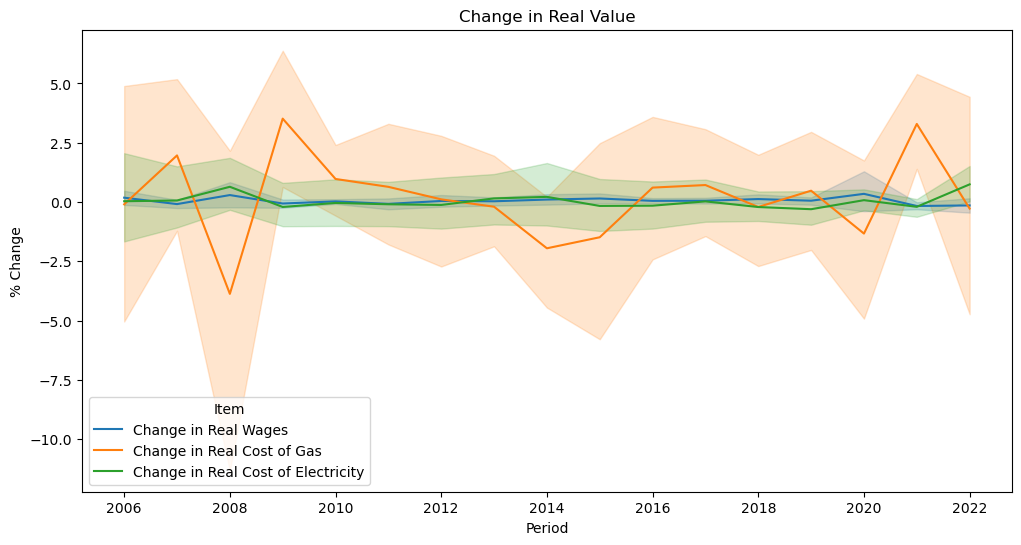

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_transf1,x=('CUUR0000SA0','Year'),y='value',hue='Item')
plt.xlabel('Period')
plt.ylabel('% Change')
plt.title('Change in Real Value')
#Plotting

Text(0.5, 1.0, 'Average Change in Real Value by Month (15-year Period)')

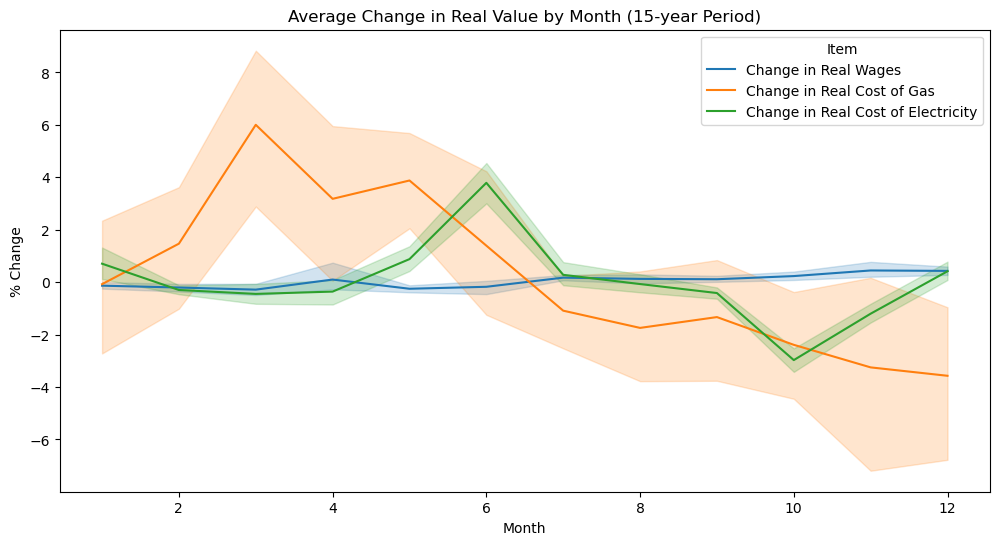

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_transf1[df_transf1[('CUUR0000SA0','Year')]>=2006],x=('CUUR0000SA0','Period'),y='value',hue='Item')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.title('Average Change in Real Value by Month (15-year Period)')
#Plotting with a filter